# Single Fluid Solution

## Alfven Mode

Here we show $\delta \mathbf v$ and $\delta \mathbf B$. First we need a plasma. 

In [1]:
from wave_instab_showcase.physics.plasma_isotropic import IsotropicPlasma


the_plasma = IsotropicPlasma()  # We just use default parameters for the plasma

Then we take the Alfven mode. For the time being, remember it is the sub 1. 

In [2]:
import numpy as np

k_vector = np.array((1.0, 0.0, 2.0))  # <-- Change this for different k.
the_wave = the_plasma.f_get_wave_modes(k_vector)[1]

Now we want to plot the delta B and delta v. Since $k_{\min} = 1$, in the length of $2\pi$ there is 1 wave. We could have a range of $10\pi$, and we have 100 points in each direction. 

In [3]:
from wave_instab_showcase.data_process.mesh_2d import Cadence, Mesh
from wave_instab_showcase.physics.plasma_isotropic import I_BY, I_VY


the_mesh = Mesh(Cadence(0.0, 101, 0.1 * np.pi), Cadence(0.0, 101, 0.1 * np.pi))
sub_v = I_VY
sub_b = I_BY
v_plot = the_mesh.get_scalar(
    the_wave.make_scalar_taker_zox_at_t_0(sub_v))
b_plot = the_mesh.get_scalar(
    the_wave.make_scalar_taker_zox_at_t_0(sub_b))
v_plot.shape, b_plot.shape

((101, 101), (101, 101))

Now as the data are yielded, we plot it on a figure. Here we just want a quick show instead of a figure of publication quality. 

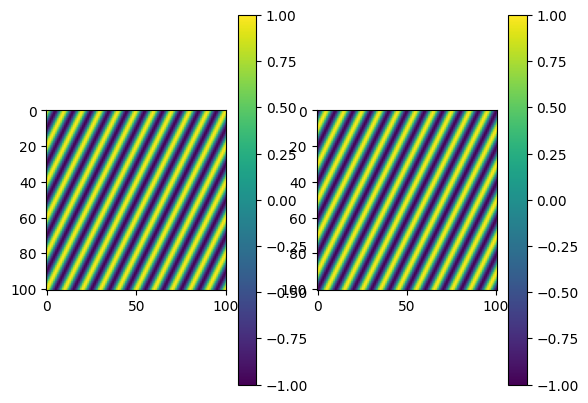

In [4]:
import matplotlib.pyplot as plt

plt.subplot(121)
plt.imshow(v_plot.T)
plt.colorbar()
plt.subplot(122)
plt.imshow(b_plot.T)
plt.colorbar()

## Slow Mode

For the slow mode we want the same $\mathbf k$ vector. For the time being we still have to use the sub 3. 

In [5]:
the_slow_mode = the_plasma.f_get_wave_modes(k_vector)[3]

We take the density plot as the background of the figure. 

In [6]:
from wave_instab_showcase.physics.plasma_isotropic import I_RHO


rho_slow = the_mesh.get_scalar(
  the_slow_mode.make_scalar_taker_zox_at_t_0(I_RHO))

rho_slow.shape, np.max(np.abs(rho_slow))

((101, 101), np.float64(0.387298334620742))

Now we are sure to get the density. Next we want the velocity and the magnetic field. Remember, the field 
is in the zox plane. 

In [7]:
from wave_instab_showcase.physics.plasma_isotropic import I_BX, I_BZ, I_VX, I_VZ


sub_v = (I_VZ, I_VX)
sub_b = (I_BZ, I_BX)
mesh_two = Mesh(Cadence(0.0, 26, 0.4 * np.pi), Cadence(0.0, 26, 0.4 * np.pi))
v_plot = mesh_two.get_vector_field_slice(
    the_slow_mode.make_vector_taker_zox_at_t_0(sub_v), True)
b_plot = mesh_two.get_vector_field_slice(
    the_slow_mode.make_vector_taker_zox_at_t_0(sub_b), True)
mesh_u0, mesh_v0 = the_mesh.mesh_x_y
mesh_u, mesh_v = mesh_two.mesh_x_y

print(the_slow_mode.get_unit_energy_oscillation)

v_plot.shape, np.max(np.linalg.norm(v_plot)), mesh_u.shape

[-0.38729833  0.70710678  0.         -0.70710678 -0.64549722 -0.9486833
  0.          0.47434165]


((26, 26, 2), np.float64(18.398369492974105), (26, 26))

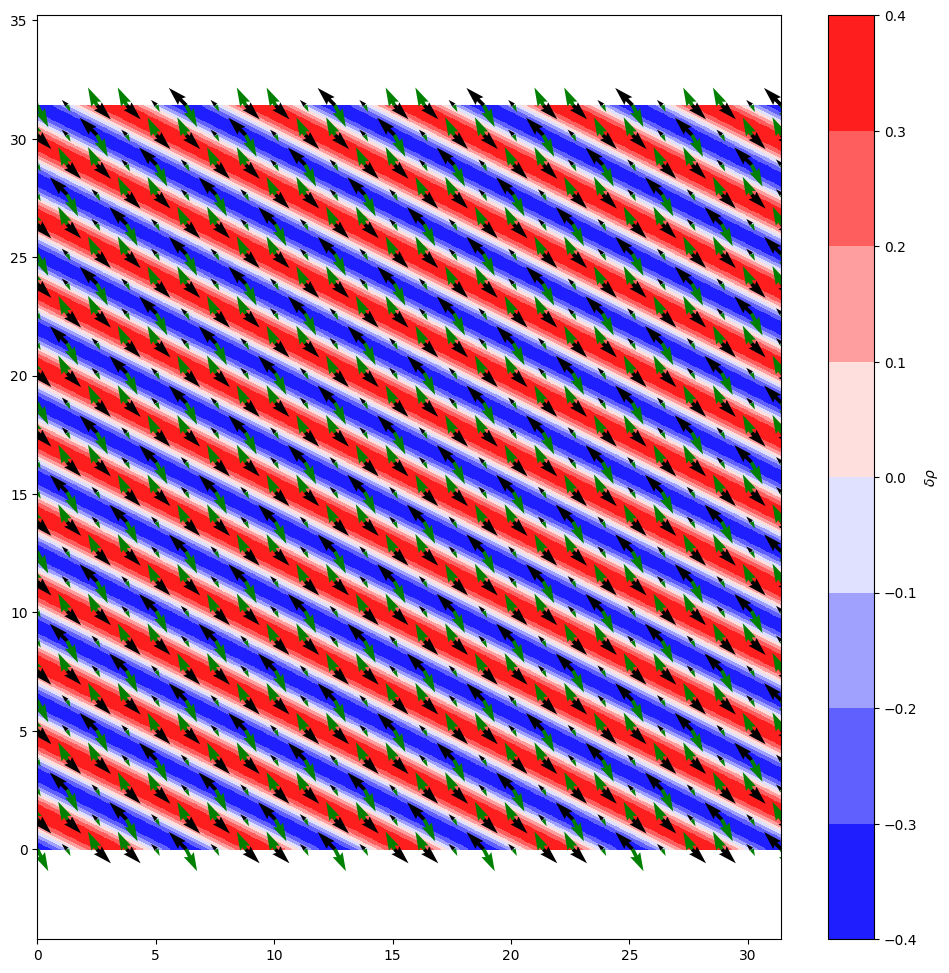

In [8]:
_, ax = plt.subplots(figsize=(12, 12))
ax.axis('equal')
contour = ax.contourf(mesh_u0, mesh_v0, rho_slow, levels=None, cmap='bwr')
plt.colorbar(contour, label=r"$\delta \rho$")
ax.quiver(mesh_u, mesh_v, v_plot[:, :, 0], v_plot[:, :, 1], width=0.005, angles='xy', pivot='tail')
ax.quiver(mesh_u, mesh_v, b_plot[:, :, 0], b_plot[:, :, 1], width=0.005, angles='xy', pivot='tail', color='#008000')